In [3]:
import sqlite3
import json

results = json.load(open("results_schema_desc.json", "r"))
for db_id in results:
    connection = sqlite3.connect(f"dev_databases/{db_id}/{db_id}.sqlite")
    cursor = connection.cursor()
    for query in results[db_id]:
        res_gold = cursor.execute(query["gold_query"]).fetchall()
        try:
            res = cursor.execute(query["generated_query"]).fetchall()
            if not res:
                query["result"] = "not executable"
                continue
            # first check if the results have the same number of rows
            if len(res_gold) != len(res):
                query["result"] = "wrong answer"
            else:
                # extract the columns from res
                res_columns = [set(col) for col in zip(*res)]
                gold_columns = [set(col) for col in zip(*res_gold)]
                query["result"] = "correct"
                for column in gold_columns:
                    if column not in res_columns:
                        query["result"] = "wrong answer"
                        break
        except Exception as e:
            query["result"] = "not executable"
    connection.close()

In [4]:
#save results to file
with open("eval_results_schema_desc.json", "w", encoding="utf-8") as f:
    json.dump(results, f, indent=2)

In [8]:
# schema_desc
# exact match

total_queries = 0
correct_queries = 0
wrong_answer_queries = 0
not_executable_queries = 0
for db_id in results:
    total_queries += len(results[db_id])
    for query in results[db_id]:
        if query["result"] == "correct":
            correct_queries += 1
        elif query["result"] == "wrong answer":
            wrong_answer_queries += 1
        elif query["result"] == "not executable":
            not_executable_queries += 1
print(f"Total queries: {total_queries}")
print(f"Correct queries: {correct_queries / total_queries * 100:.2f}%")
print(f"Wrong answer queries: {wrong_answer_queries / total_queries * 100:.2f}%")
print(f"Not executable queries: {not_executable_queries / total_queries * 100:.2f}%")

Total queries: 500
Correct queries: 23.80%
Wrong answer queries: 40.60%
Not executable queries: 35.60%


In [15]:
# schema_desc
# match

total_queries = 0
correct_queries = 0
wrong_answer_queries = 0
not_executable_queries = 0
for db_id in results:
    total_queries += len(results[db_id])
    for query in results[db_id]:
        if query["result"] == "correct":
            correct_queries += 1
        elif query["result"] == "wrong answer":
            wrong_answer_queries += 1
        elif query["result"] == "not executable":
            not_executable_queries += 1
print(f"Total queries: {total_queries}")
print(f"Correct queries: {correct_queries / total_queries * 100:.2f}%")
print(f"Wrong answer queries: {wrong_answer_queries / total_queries * 100:.2f}%")
print(f"Not executable queries: {not_executable_queries / total_queries * 100:.2f}%")

Total queries: 272
Correct queries: 54.04%
Wrong answer queries: 33.46%
Not executable queries: 12.50%


In [19]:
# schema_only
# match

total_queries = 0
correct_queries = 0
wrong_answer_queries = 0
not_executable_queries = 0
for db_id in results:
    total_queries += len(results[db_id])
    for query in results[db_id]:
        if query["result"] == "correct":
            correct_queries += 1
        elif query["result"] == "wrong answer":
            wrong_answer_queries += 1
        elif query["result"] == "not executable":
            not_executable_queries += 1
print(f"Total queries: {total_queries}")
print(f"Correct queries: {correct_queries / total_queries * 100:.2f}%")
print(f"Wrong answer queries: {wrong_answer_queries / total_queries * 100:.2f}%")
print(f"Not executable queries: {not_executable_queries / total_queries * 100:.2f}%")

Total queries: 272
Correct queries: 47.06%
Wrong answer queries: 34.56%
Not executable queries: 18.38%


In [5]:
# schema_desc

results = json.load(open("eval_results_schema_desc.json", "r"))
evals_schema_desc = {}

accuracies = []
for db_id in results:
    evals_schema_desc[db_id] = {}
    total_queries = 0
    correct_queries = 0
    wrong_answer_queries = 0
    not_executable_queries = 0
    total_queries += len(results[db_id])
    for query in results[db_id]:
        if query["result"] == "correct":
            correct_queries += 1
        elif query["result"] == "wrong answer":
            wrong_answer_queries += 1
        elif query["result"] == "not executable":
            not_executable_queries += 1
    evals_schema_desc[db_id]["total_queries"] = total_queries
    evals_schema_desc[db_id]["accuracy"] = f"{(correct_queries / total_queries * 100):.2f}%"
evals_schema_desc

{'debit_card_specializing': {'total_queries': 30, 'accuracy': '26.67%'},
 'financial': {'total_queries': 32, 'accuracy': '6.25%'},
 'formula_1': {'total_queries': 66, 'accuracy': '31.82%'},
 'california_schools': {'total_queries': 30, 'accuracy': '10.00%'},
 'card_games': {'total_queries': 52, 'accuracy': '21.15%'},
 'european_football_2': {'total_queries': 51, 'accuracy': '25.49%'},
 'thrombosis_prediction': {'total_queries': 50, 'accuracy': '4.00%'},
 'toxicology': {'total_queries': 40, 'accuracy': '17.50%'},
 'student_club': {'total_queries': 48, 'accuracy': '45.83%'},
 'superhero': {'total_queries': 52, 'accuracy': '48.08%'},
 'codebase_community': {'total_queries': 49, 'accuracy': '32.65%'}}

In [6]:
# schema_only

results = json.load(open("eval_results_schema_only.json", "r"))
evals_schema_only = {}

accuracies = []
for db_id in results:
    evals_schema_only[db_id] = {}
    total_queries = 0
    correct_queries = 0
    wrong_answer_queries = 0
    not_executable_queries = 0
    total_queries += len(results[db_id])
    for query in results[db_id]:
        if query["result"] == "correct":
            correct_queries += 1
        elif query["result"] == "wrong answer":
            wrong_answer_queries += 1
        elif query["result"] == "not executable":
            not_executable_queries += 1
    evals_schema_only[db_id]["total_queries"] = total_queries
    evals_schema_only[db_id]["accuracy"] = f"{(correct_queries / total_queries * 100):.2f}%"
evals_schema_only

{'debit_card_specializing': {'total_queries': 30, 'accuracy': '26.67%'},
 'financial': {'total_queries': 32, 'accuracy': '0.00%'},
 'formula_1': {'total_queries': 66, 'accuracy': '27.27%'},
 'california_schools': {'total_queries': 30, 'accuracy': '13.33%'},
 'card_games': {'total_queries': 52, 'accuracy': '19.23%'},
 'european_football_2': {'total_queries': 51, 'accuracy': '21.57%'},
 'thrombosis_prediction': {'total_queries': 50, 'accuracy': '0.00%'},
 'toxicology': {'total_queries': 40, 'accuracy': '15.00%'},
 'student_club': {'total_queries': 48, 'accuracy': '43.75%'},
 'superhero': {'total_queries': 52, 'accuracy': '51.92%'},
 'codebase_community': {'total_queries': 49, 'accuracy': '28.57%'}}

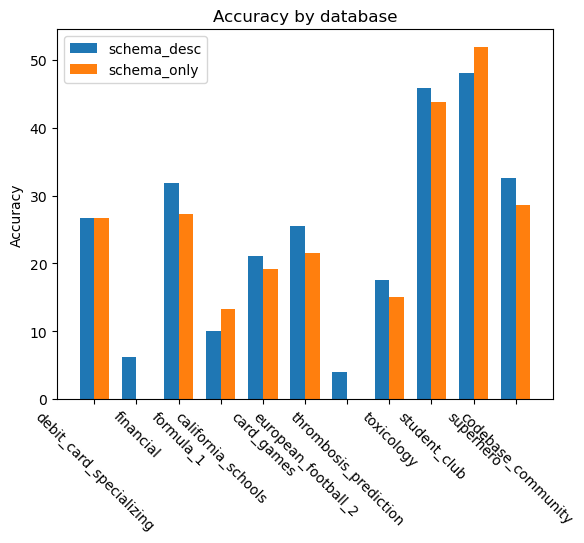

In [7]:
# plot the comparison of accuracies
import matplotlib.pyplot as plt
import numpy as np

db_ids = list(evals_schema_desc.keys())
accuracies_schema_desc = [float(evals_schema_desc[db_id]["accuracy"][:-1]) for db_id in db_ids]
accuracies_schema_only = [float(evals_schema_only[db_id]["accuracy"][:-1]) for db_id in db_ids]

x = np.arange(len(db_ids))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracies_schema_desc, width, label='schema_desc')
rects2 = ax.bar(x + width/2, accuracies_schema_only, width, label='schema_only')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by database')
ax.set_xticks(x)
ax.set_xticklabels(db_ids)
plt.xticks(rotation=-45)
ax.legend()

plt.show()